In [1]:
import tensorflow as tf
import glob
import scipy.io.wavfile as wavfile
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal
import stft
%matplotlib inline

In [2]:
global SMP_RATE
SMP_RATE = 16000

In [225]:
def write_audio(wav_data,fname='samples/inverse_audio_spec.wav'):
    f = open(fname,'wr')
    wavfile.write(f,SMP_RATE,wav_data.astype(np.int16))
    f.close()

In [4]:
# mpath = '../../cmu_artic/male_us_bdl/' #desktop
mpath = '../data/male_us/'

In [5]:
#test case
filename =glob.glob(mpath+'*.wav')[0]
fm, wav_data = wavfile.read(filename)

# Time domain

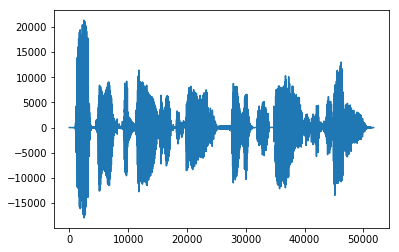

In [6]:
plt.plot(wav_data)

# Spectrogram parameters

In [193]:
#window length 30 ms
window_sec = .02
seg_size = int(SMP_RATE*window_sec)

#overlap
overlap_size=0#int(seg_size*.25)

# Spectrogram

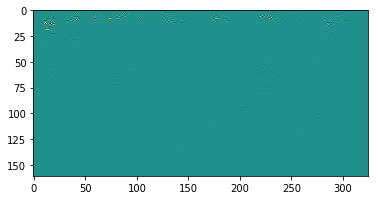

In [235]:
plt.imshow(np.real(stft.spectrogram(wav_data,framelength=seg_size,overlap=2)))

In [240]:
specgram = stft.spectrogram(wav_data,framelength=seg_size,overlap=2)
reals,ims = np.real(specgram),np.imag(specgram)
output = stft.ispectrogram(reals+1j*ims,framelength=seg_size,overlap=2)
write_audio(output)

In [238]:
print reals.shape

(161, 325)


In [239]:
#generated
f = open('samples/inverse_audio_spec.wav','wr')
wavfile.write(f,SMP_RATE,output.astype(np.int16))
f.close()

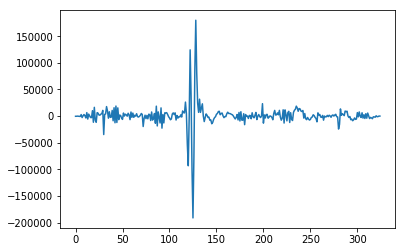

In [211]:
plt.plot(reals[0,:])

# Just FFT

In [213]:
from scipy.fftpack import fft, ifft

In [219]:
fft_result = fft(wav_data)

In [221]:
fft_result.shape

(51761,)

In [215]:
np.real(fft(wav_data))

array([ 30530.        ,  21720.76349344, -34561.74712783, ...,
        -8246.56076864, -34561.74712783,  21720.76349344])

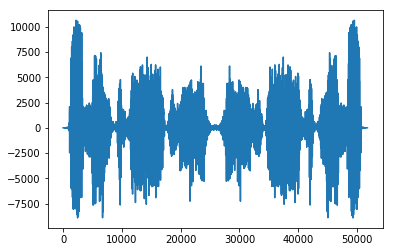

In [222]:
plt.plot(ifft(np.real(fft(wav_data))))

In [227]:
write_audio(ifft(fft(wav_data)))

/Users/tmulc/anaconda2/envs/tensorflow1/lib/python2.7/site-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


# Doesn't work

# Using SciPy

In [197]:
overlap_size

0

In [199]:
spec = signal.spectrogram(wav_data,fm,window='cosine',nperseg=seg_size,noverlap=None)
#t,inverse_audio = signal.istft(Sxx,fm,window='cosine',nperseg=seg_size,noverlap=None)
#plt.plot(inverse_audio)

In [200]:
f,t,Sxx = spec

In [201]:
len(f)

161

In [202]:
len(t)

184

In [203]:
Sxx.shape

(161, 184)

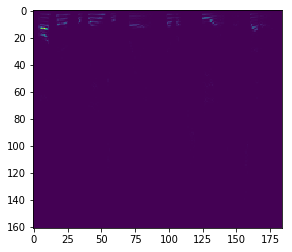

In [204]:
plt.imshow(Sxx)

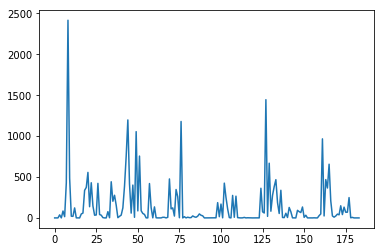

In [207]:
plt.plot(Sxx[0,:])

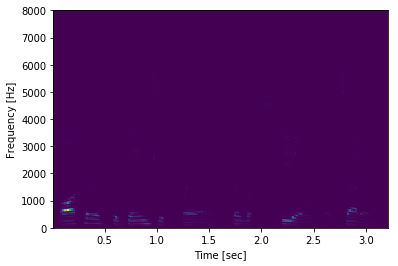

In [205]:
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [131]:
#spec = signal.stft(wav_data,fm)

In [132]:
#f,t,Sxx = spec

In [133]:
#Sxx.shape

# Spectrogram notes

The spectrogram is really just a 2D input, but we will need to get information like the frequencies and length of time if we are going to invert it.  Since all the data is sampled at the same rate and we are using binning, we can keep the same frequency vector for all audio sample and just change the time vector for each bin (binning is of course happening at the time level)

# Test Inverse Spectorgram

In [134]:
t,inverse_audio = signal.istft(Sxx,fm,window='cosine',nperseg=seg_size)
plt.plot(inverse_audio)

ValueError: Window, STFT shape and noverlap do not satisfy the COLA constraint.

# Write audio

In [146]:
f = open('samples/org_audio_spec.wav','wr')
wavfile.write(f,SMP_RATE,wav_data.astype(np.int16))
f.close()

In [93]:
#generated
f = open('samples/inverse_audio_spec.wav','wr')
wavfile.write(f,SMP_RATE,inverse_audio.astype(np.int16))
f.close()

# Random